In [108]:
import numpy as np
from typing import List
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [109]:
from Point import Point
from Functions import Function, Constraint
from KM_Algo import KungMethod



In [110]:
#STEP 1
mu = 0.25
beta = 0.5
k = int(0)

### EXAMPLE PROBLEM 1


In [ ]:
#STEP 2
# Create 3 objects of class Point with random vectors of dimension 3


m = ["f1","f2"]

def f1(x):
    return -x[0]

def f1_d(x):
    return [-1,0]

func_f1 = Function(f1,f1_d,"f1")

def f2(x):
    return x[0] + x[1]

def f2_d(x):    
    return [1,1]

func_f2 = Function(f2,f2_d,"f2")

functions = [func_f1,func_f2]


def g1(x):
    return x[0] - 1

def g1_d(x):
    return [1,0]

constraint_g1 = Constraint(g1,g1_d,"g1")

def g2(x):
    return x[1] - 1

def g2_d(x):
    return [0,1]

constraint_g2 = Constraint(g2,g2_d,"g2")

def g3(x): 
    return -x[0]

def g3_d(x):
    return [-1,0]

constraint_g3 = Constraint(g3,g3_d,"g3")

def g4(x):
    return -x[1]

def g4_d(x):
    return [0,-1]

constraint_g4 = Constraint(g4,g4_d,"g4")

g = [constraint_g1,constraint_g2,constraint_g3,constraint_g4]
h = []




### Example Problem 2

MINIMISE 
$\\f_1(x) = 10x_1 + 2x_2\\$
$f_2(x) = 3x_1 ^ 2 + 2x_2 ^ 2 + x_1$ 

SUBJECT TO
$\\ x_1 \geq 2\\$
$ x_2 \geq 3 \\$
$ x_1 + x_2 \leq 12$

Both f_1 and f_2 are continously differentiable 



In [ ]:
#STEP 2
# Create 3 objects of class Point with random vectors of dimension 3


m = ["f1","f2"]

#f1
def f1(x):
    return 10*x[0] + 2*x[1]

#Partial derivatives of f1
def f1_d(x):
    return [10,2]

#Cretae object of class Function
func_f1 = Function(f1,f1_d,"f1")

def f2(x):
    return 3* x[0]**2 + 2*x[1]**2 + x[0]

def f2_d(x):
    return [6*x[0] + 1 ,4*x[1]]

func_f2 = Function(f2,f2_d,"f2")

functions = [func_f1,func_f2]


def g1(x):
    return 2 - x[0]

def g1_d(x):
    return [-1,0]

constraint_g1 = Constraint(g1,g1_d,"g1")

def g2(x):
    return 3 - x[1]

def g2_d(x):
    return [0,-1]

constraint_g2 = Constraint(g2,g2_d,"g2")

def g3(x): 
    return x[1] + x[0] - 12

def g3_d(x):
    return [1,1]

constraint_g3 = Constraint(g3,g3_d,"g3")

g = [constraint_g1,constraint_g2,constraint_g3]
h = []





### Example Problem 3

MINIMISE 
$\\f_1(x) = (x_1 - 2)^2 + (x_2 -3)^2\\$
$f_2(x) = (\frac{x_1}{2})^2 +(\frac{x_2}{5})^2 + 10 sin(x_1)cos(x_2) $

SUBJECT TO
$\\1 \le x_1 \le 5\\$
$0 \le x_" \le 6\\$

Both f_1 and f_2 are continously differentiable 



In [255]:
#STEP 2
# Create 3 objects of class Point with random vectors of dimension 3


from math import cos, sin


m = ["f1","f2"]

#f1
def f1(x):
    return (x[0] - 2)**2 + (x[1] - 3)**2

#Partial derivatives of f1
def f1_d(x):
    return [2*(x[0] - 2),2*(x[1] - 3)]

#Cretae object of class Function
func_f1 = Function(f1,f1_d,"f1")

def f2(x):
    return (x[0]/2)**2 + (x[1]/5)**2 + 10 * sin(x[0])*cos(x[1]) 

def f2_d(x):
    t1 = x[0]/2 + 10*cos(x[0])*cos(x[1])
    t2 = (2 *x[1])/25 - 10*sin(x[0])*sin(x[1])
    return [t1,t2]

func_f2 = Function(f2,f2_d,"f2")

functions = [func_f1,func_f2]


def g1(x):
    return 1 - x[0]

def g1_d(x):
    return [-1,0]

constraint_g1 = Constraint(g1,g1_d,"g1")

def g2(x):
    return x[0] - 5

def g2_d(x):
    return [1,0]

constraint_g2 = Constraint(g2,g2_d,"g2")

def g3(x): 
    return -x[1]

def g3_d(x):
    return [0,-1]

constraint_g3 = Constraint(g3,g3_d,"g3")

def g4(x): 
    return x[1] - 6

def g4_d(x):
    return [0,1]

constraint_g3 = Constraint(g3,g3_d,"g4")

g = [constraint_g1,constraint_g2,constraint_g3,constraint_g4]
h = []





In [256]:
#Generate points
np.random.seed(41)

n=1000
Xorg = []

for i in range(n):
    point = Point (np.random.rand(2))  
    point.evaluate(functions)
    Xorg.append(point)


<class 'list'>


C:\Users\ellie\AppData\Local\Temp\ipykernel_36968\201232420.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


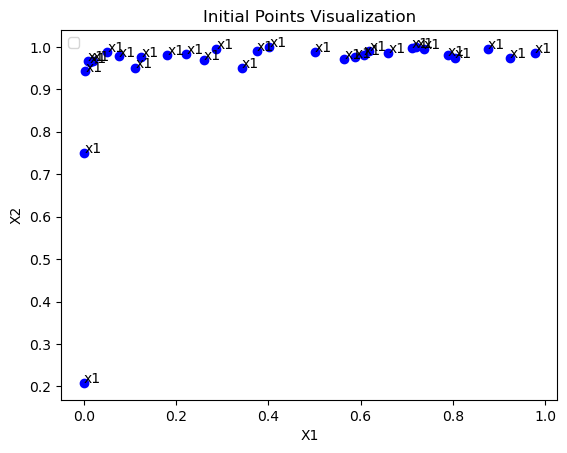

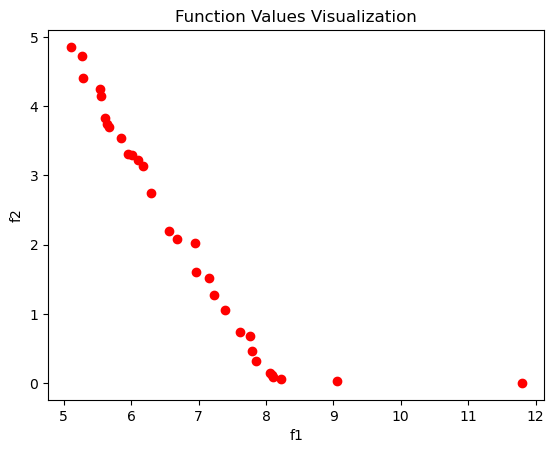

In [257]:
X0 = Xorg.copy()
print(type(X0))
f_val = []

i = 1

# # fig, ax = plt.subplots()
# # for point in X0:
# #     plt.scatter(point.vector[0], point.vector[1], color='blue')
# #     ax.annotate('x'+str(i), (point.vector[0], point.vector[1]))
# #     i += 1
# #     f_val.append(point.eval_f)

 

# # plt.xlabel('X1')
# plt.ylabel('X2')
# plt.title('Initial Points Visualization')
# plt.legend()
# plt.show()

# for val in f_val:
#     plt.scatter(val[0], val[1], color='red')

# plt.xlabel('f1')
# plt.ylabel('f2')
# plt.title('Function Values Visualization')
# plt.show()

V = KungMethod(X0)

fig, ax = plt.subplots()

f_val = []
for point in V:
    plt.scatter(point.vector[0], point.vector[1], color='blue')
    ax.annotate('x'+str(i), (point.vector[0], point.vector[1]))
    f_val.append(point.eval_f)
 

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Initial Points Visualization')
plt.legend()
plt.show()

for val in f_val:
    plt.scatter(val[0], val[1], color='red')

plt.xlabel('f1')
plt.ylabel('f2')
plt.title('Function Values Visualization')
plt.show()


In [258]:
def search_dir(x,g:List[Constraint],h:List[Constraint],f1:Function,n:int):
    """
    Solve the quadratic optimisation problem
    min delta(f)^T * d + 1/2 * d^T * H * d

    Args: x - current point
          g - list of functions that define inequality <= constraints
          h - list of functions that define equality == constraints
          f1_d - gradient of the function f1 at x
          

    Returns: d
    Note: H is currently the Identity matrix
    
    """

    x_v = x.vector
    df_x = x.eval_d[n]
    # Define the objective function for scipy minimize
    def objective(d):
        return np.dot(df_x, d) + 0.5 * np.dot(d, d)

    # Define the constraints for scipy minimize
    constraints = []
    for f in g:
        constraints.append({'type': 'ineq', 'fun': lambda d, f=f: f(x_v) + np.dot(f.evaluate_gradient(x_v), d)})

    for f in h:
        constraints.append({'type': 'eq', 'fun': lambda d, f=f: f(x_v) + np.dot(f.evaluate_gradient(x_v), d)})

    # Initial guess for d
    d0 = np.zeros(len(x_v))

    # Solve the optimization problem
    result = minimize(objective, d0, constraints=constraints)

    d_values = result.x

    return d_values

In [259]:
#CALCULATING PENALTY PARAMETER

def penalty(g: List[Constraint], h: List[Constraint], x: Point,f1:Function,beta, b: float = 0.001):
      """
      Calculate the penalty parameter for a given point x
      as described in:
      A SUPERLINEARLY CONVERGENT ALGORITHM FOR CONSTRAINED OPTIMIZATION PROBLEMS*

      Args: g - list of functions that define inequality <= constraints
            h - list of functions that define equality == constraints
            x - current point
            mu - penalty parameter

      Returns: mu
      """

      x_vector = x.vector

      
      #TODO maybe calc this as input to avoid repeated calculations
      #Matrix of deriv calculations
      G_d = [g[i].evaluate_gradient(x_vector) for i in range(len(g))]
      H_d = [h[i].evaluate_gradient(x) for i in range(len(h))] 

      #TODO move next calc out of function and pass as input , place before main loop in order to avoid repeated calculations
      #Max value of g and h func evaled at x
      G = [g[i](x_vector) for i in range(len(g))]
      H = [np.abs(h[i].func(x_vector)) for i in range(len(h))]
      psi = max(max(G, default=float('-inf')), max(H, default=float('-inf')))


      def minFunc(l_mu):
            l = l_mu[:len(G)]
            mu = l_mu[len(G):]
            term1 = np.linalg.norm(f1.evaluate_gradient(x_vector) + np.dot(np.array(G_d).T,l) + np.dot(np.array(H_d).T,mu))**2
            term2 = np.sum([((psi -G[i])**2)*(l[i]**2) for i in range(len(G))])
            term3 = np.sum([((psi -np.abs(H[i]))**2)*(mu[i]**2) for i in range(len(H))])
            return term1 + term2 + term3 
      
      initial_guess = np.zeros(len(G) + len(H))
      result = minimize(minFunc, initial_guess)
      
      l_opt = result.x[:len(G)]
      mu_opt = result.x[len(G):]
      #Calculate the penalty parameter
      
      c = np.sum(l_opt) + sum(np.linalg.norm(vector) for vector in mu_opt)
      c = max(c + b, b)

      #Penalty func = f(x) + c * psi(x)
      f1_x = f1(x_vector)
    
      return c,psi

In [260]:
#merit function
def merit(x,g:List[Constraint],h:List[Constraint],f1:Function, p):
      """
      Calculate the merit function for a given point x
      as described in:
      A SUPERLINEARLY CONVERGENT ALGORITHM FOR CONSTRAINED OPTIMIZATION PROBLEMS*

      Args: x - current point
            g - list of functions that define inequality <= constraints
            h - list of functions that define equality == constraints
            f1 - function to be minimised
            mu - penalty parameter

            

      Returns: merit function value
      """

      m = f1(x) + p* (sum([g[i].func(x) for i in range(len(g))])) + p * (sum([np.abs(h[i].func(x)) for i in range(len(h))]))
      return m
                        

In [261]:
#merit function
def merit_d(x: List,g:List[Constraint],h:List[Constraint],f1:Function, psi,d):
      """
      Calculate the merit function for a given point x
      as described in:
      A SUPERLINEARLY CONVERGENT ALGORITHM FOR CONSTRAINED OPTIMIZATION PROBLEMS*

      Args: x - current point
            g - list of functions that define inequality <= constraints
            h - list of functions that define equality == constraints
            f1 - function to be minimised
            mu - penalty parameter

      Returns: merit function value
      """

      G_deriv = [g[i].evaluate_gradient(x) * d for i in range(len(g))]
      H_deriv = [h[i].evaluate_gradient(x) * d if h[i](x) == 0 else 0 for i in range(len(h))]


      dir_deriv = G_deriv + H_deriv
      

      m_d = np.dot(f1.evaluate_gradient(x),d)
      m_d = m_d + psi * (np.linalg.norm(dir_deriv))

      return m_d
                        

In [262]:
def alpha_val(x:Point, d, beta,c,psi, g:List[Constraint], h:List[Constraint], f1:Function, mu):
    """
    Calculate the step size for a given point x
    as described in:
    A SUPERLINEARLY CONVERGENT ALGORITHM FOR CONSTRAINED OPTIMIZATION PROBLEMS*

    Args: x - current point
          beta - step size reduction factor
          g - list of functions that define inequality <= constraints
          h - list of functions that define equality == constraints
          f1 - function to be minimised

    Returns: alpha
    """
    x_vector = x.vector
    #Calculate the step size
    pen1 = f1(x_vector) 
    pen = pen1  + c * psi
    alpha = 1
    while True:
        #TODO : the output dimensions do not match
        merit1 = merit(x_vector + alpha*d,g,h,f1,pen)
        merit2 = merit(x_vector,g,h,f1,pen) + mu * alpha * merit_d(x_vector,g,h,f1,psi,d)

        if merit1 <= merit2:
            break
        alpha = alpha * beta

    return alpha

In [263]:
def display(X:List[Point],XS:List[Point]):
    import matplotlib.pyplot as plt

    
    for point in XS:
        plt.scatter(point.eval_f[0], point.eval_f[1], color='red', label='XS' if 'XS' not in plt.gca().get_legend_handles_labels()[1] else "")

    for point in X:
        plt.scatter(point.eval_f[0], point.eval_f[1], color='blue', label='X0' if 'X0' not in plt.gca().get_legend_handles_labels()[1] else "")

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Function Visualization')
    plt.legend()
    plt.show()


    for point in XS:
        plt.scatter(point.vector[0], point.vector[1], color='red', label='XS' if 'XS' not in plt.gca().get_legend_handles_labels()[1] else "")

    for point in X:
        plt.scatter(point.vector[0], point.vector[1], color='blue', label='X0' if 'X0' not in plt.gca().get_legend_handles_labels()[1] else "")

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Points Visualization')
    plt.legend()
    plt.show()


In [264]:
#Number of iterations
from numpy import concat, concatenate

X0 = Xorg.copy()


iter = 1000
#Tolerance
tol = 0.0001

#Num of objectives



#SET OF "STOPPED" POINTS
#HOW MANY ITERATIONS TO RUN BEFORE STOPPING
for i in range(iter):
    T = []
    #FOR EACH POINT IN X0 THE SET OF RANDOM POINTS
    for p in X0:

        #CHEK IF POINT IS STOPPED
        if p.stopped != True:

            #FOR EACH OBJECTIVE FUNCTION
            for j in range(0,len(functions)):
                
                #COMPUTE SEARCH DIRECTION
                #TODO:CHange this to include constraints as well
                d = search_dir(p,g,h,functions[j],j)

                #IF SEARCH DIRECTION IS TOO SMALL,CONTINUE TO EVAL NEXT OBJ FUNC
                if np.linalg.norm(d) < np.power(tol, 1/4):
                    continue

                c,psi = penalty(g,h,p,functions[j],mu)

                alpha = alpha_val(p, np.array(d), beta, c, psi, g, h, functions[j], mu)

                if np.linalg.norm(d) < np.sqrt(tol):
                    continue

                p_new = Point(p.vector + alpha * np.array(d))
                p_new.evaluate(functions)

                T.append(p_new)

            p.stopped = True
    
    X0.extend(T)
    print(f"Iter {i}, X length {len(X0)}")
    X0 = KungMethod(X0)
    
    

Iter 0, X length 2846
Iter 1, X length 18
Iter 2, X length 15
Iter 3, X length 9
Iter 4, X length 7
Iter 5, X length 7
Iter 6, X length 7
Iter 7, X length 7
Iter 8, X length 7
Iter 9, X length 7
Iter 10, X length 7
Iter 11, X length 7
Iter 12, X length 7
Iter 13, X length 7
Iter 14, X length 7
Iter 15, X length 7
Iter 16, X length 7
Iter 17, X length 7
Iter 18, X length 7
Iter 19, X length 7
Iter 20, X length 7
Iter 21, X length 7
Iter 22, X length 7
Iter 23, X length 7
Iter 24, X length 7
Iter 25, X length 7
Iter 26, X length 7
Iter 27, X length 7
Iter 28, X length 7
Iter 29, X length 7
Iter 30, X length 7
Iter 31, X length 7
Iter 32, X length 7
Iter 33, X length 7
Iter 34, X length 7
Iter 35, X length 7
Iter 36, X length 7
Iter 37, X length 7
Iter 38, X length 7
Iter 39, X length 7
Iter 40, X length 7
Iter 41, X length 7
Iter 42, X length 7
Iter 43, X length 7
Iter 44, X length 7
Iter 45, X length 7
Iter 46, X length 7
Iter 47, X length 7
Iter 48, X length 7
Iter 49, X length 7
Iter 

[<Point.Point object at 0x000001FFA3F2C280>, <Point.Point object at 0x000001FFA29C9B00>, <Point.Point object at 0x000001FFA6D63540>, <Point.Point object at 0x000001FFA5F154E0>, <Point.Point object at 0x000001FFA27964A0>, <Point.Point object at 0x000001FFA29CA040>, <Point.Point object at 0x000001FFA5F15FD0>, <Point.Point object at 0x000001FFA29CA6D0>, <Point.Point object at 0x000001FFA25CDA20>, <Point.Point object at 0x000001FFA5F16510>, <Point.Point object at 0x000001FFA92A7D90>, <Point.Point object at 0x000001FFA5F151D0>, <Point.Point object at 0x000001FFA23D60B0>, <Point.Point object at 0x000001FFA92A62E0>, <Point.Point object at 0x000001FFA5F14360>, <Point.Point object at 0x000001FFA92A7C40>, <Point.Point object at 0x000001FFA23D4DE0>, <Point.Point object at 0x000001FFA29CADD0>, <Point.Point object at 0x000001FFA29C9FD0>, <Point.Point object at 0x000001FFA5F14EC0>, <Point.Point object at 0x000001FFA2B46350>, <Point.Point object at 0x000001FFA2797B60>, <Point.Point object at 0x000001

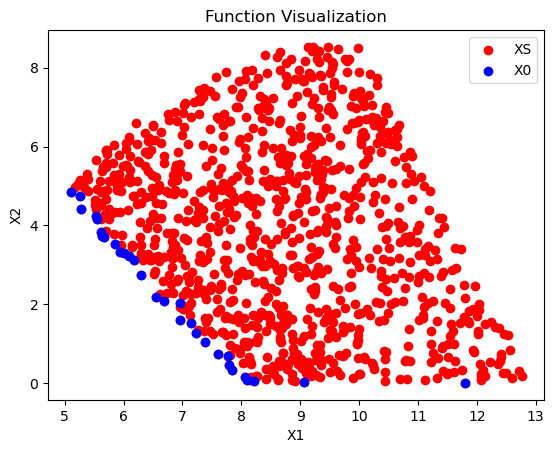

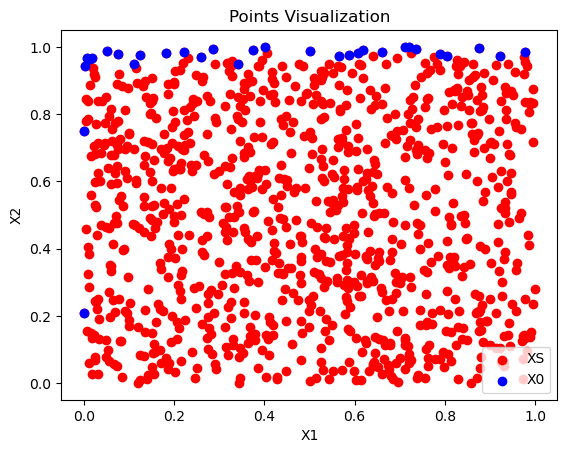

In [253]:
print(X0)
display(X0,Xorg)


C:\Users\ellie\AppData\Local\Temp\ipykernel_36968\3151587504.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


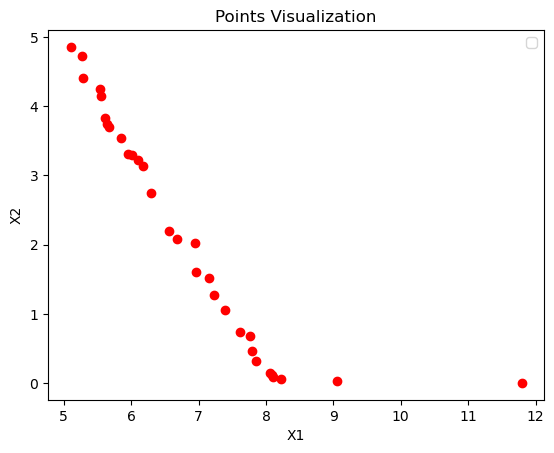

In [254]:
for point in X0:
    plt.scatter(point.eval_f[0], point.eval_f[1], color='red')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Points Visualization')
plt.legend()
plt.show()